# Title:“Analyzing Traffic Data: Impact of Road Conditions, Weather & Time on Accidents”

In [4]:
#Step 1: Import Libraries and Load Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('US_Accidents_March23.csv')

In [3]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
#Step 2: Basic Data Exploration

In [6]:
print(df.shape)

(7728394, 46)


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [8]:
print(df.isnull().sum())

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [9]:
#Step 3: Data Cleaning

In [11]:
df.drop(columns=[
    'End_Lat', 'End_Lng', 'Wind_Chill(F)', 'Precipitation(in)'], inplace=True)

In [12]:
df.drop(columns=['Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Sunrise_Sunset', 'Weather_Timestamp', 'Airport_Code'], inplace=True)

In [13]:
df['Weather_Condition'].fillna(df['Weather_Condition'].mode()[0], inplace=True)
df['Wind_Direction'].fillna(df['Wind_Direction'].mode()[0], inplace=True)
df['City'].fillna(df['City'].mode()[0], inplace=True)

In [14]:
df['Temperature(F)'].fillna(df['Temperature(F)'].mean(), inplace=True)
df['Humidity(%)'].fillna(df['Humidity(%)'].mean(), inplace=True)
df['Pressure(in)'].fillna(df['Pressure(in)'].mean(), inplace=True)
df['Visibility(mi)'].fillna(df['Visibility(mi)'].mean(), inplace=True)
df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].mean(), inplace=True)

In [15]:
df.dropna(inplace=True)

In [21]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed', errors='coerce')


In [22]:
df = df.dropna(subset=['Start_Time'])

In [23]:
df['Hour'] = df['Start_Time'].dt.hour
df['Day'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()
df['Year'] = df['Start_Time'].dt.year

In [24]:
df['Time_of_Day'] = df['Hour'].apply(lambda x: 'Night' if x < 6 or x >= 18 else 'Day')

In [25]:
#Step 4:  Analyze Accidents by Road Condition

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

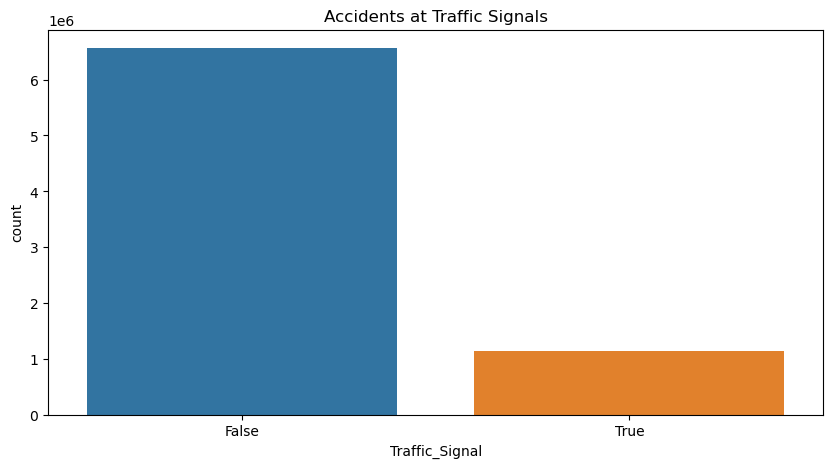

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Traffic_Signal')
plt.title("Accidents at Traffic Signals")
plt.show()

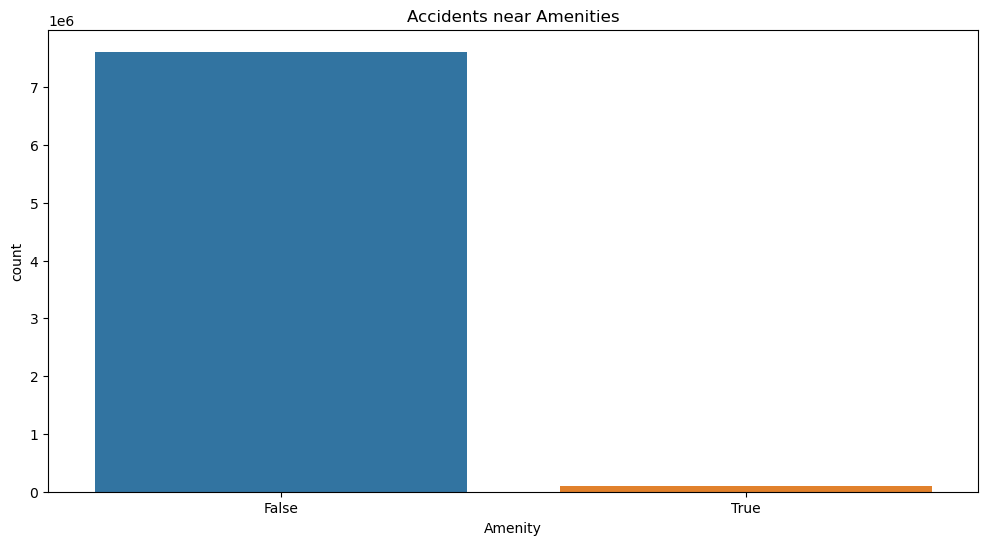

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Amenity')
plt.title("Accidents near Amenities")
plt.show()

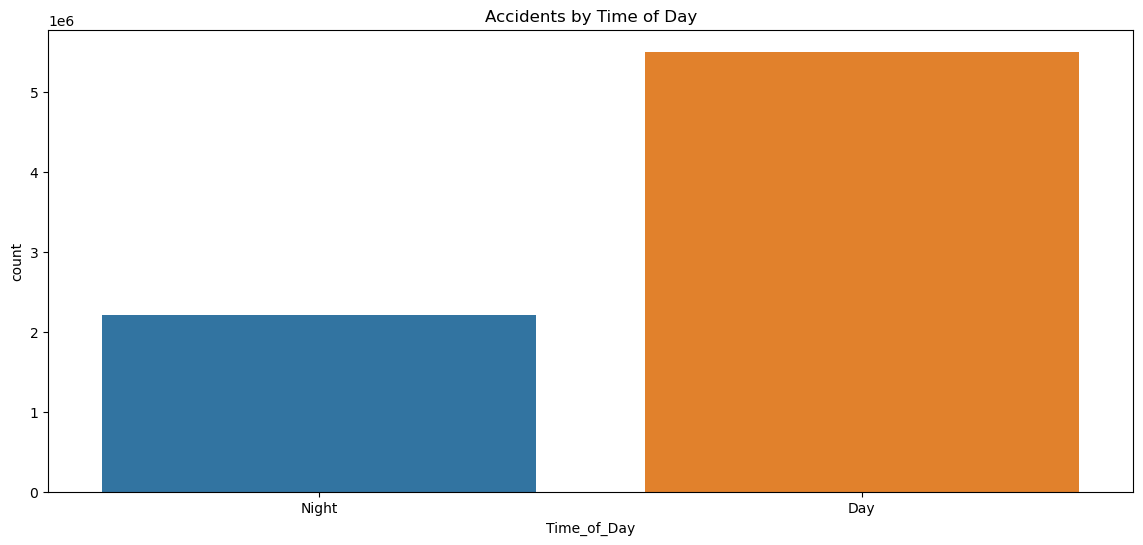

In [29]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Time_of_Day')
plt.title("Accidents by Time of Day")
plt.show()

In [30]:
#Step 5: Weather Condition Impact

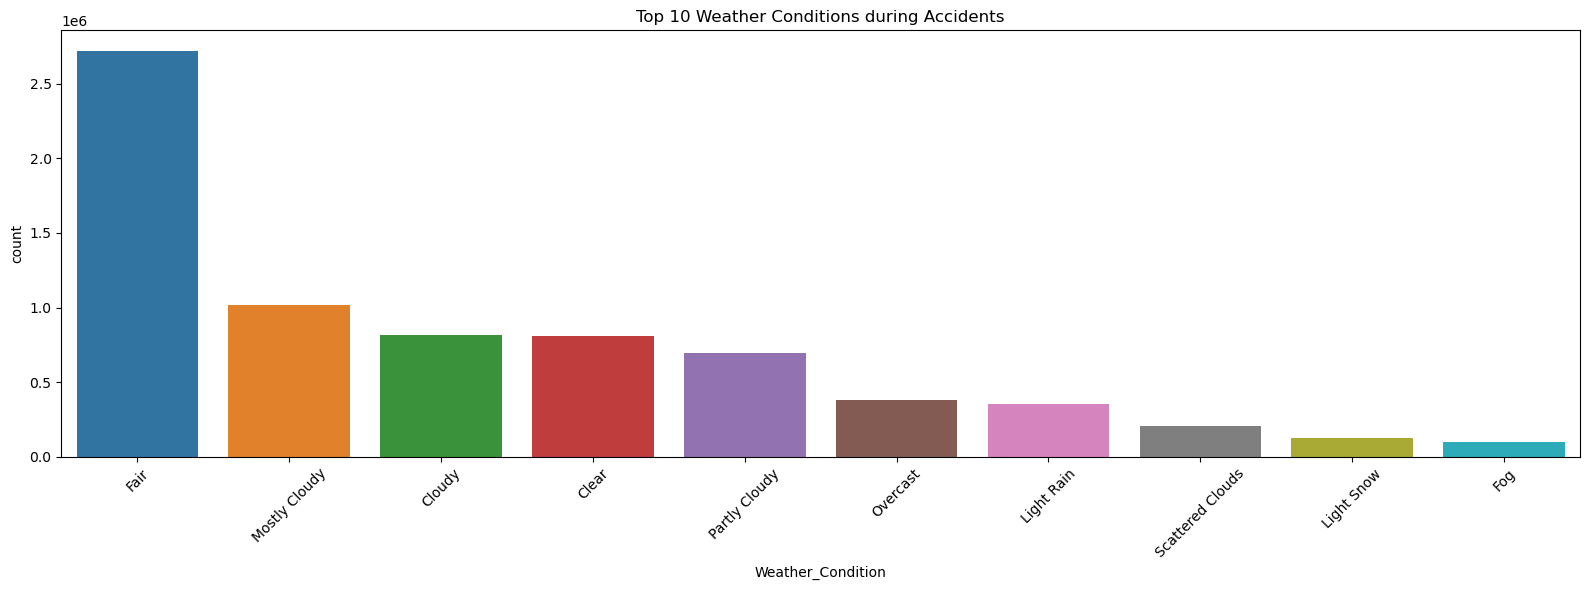

In [31]:
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='Weather_Condition', order=df['Weather_Condition'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title("Top 10 Weather Conditions during Accidents")
plt.tight_layout()
plt.show()

In [32]:
#Step 6: Hourly Accident Distribution

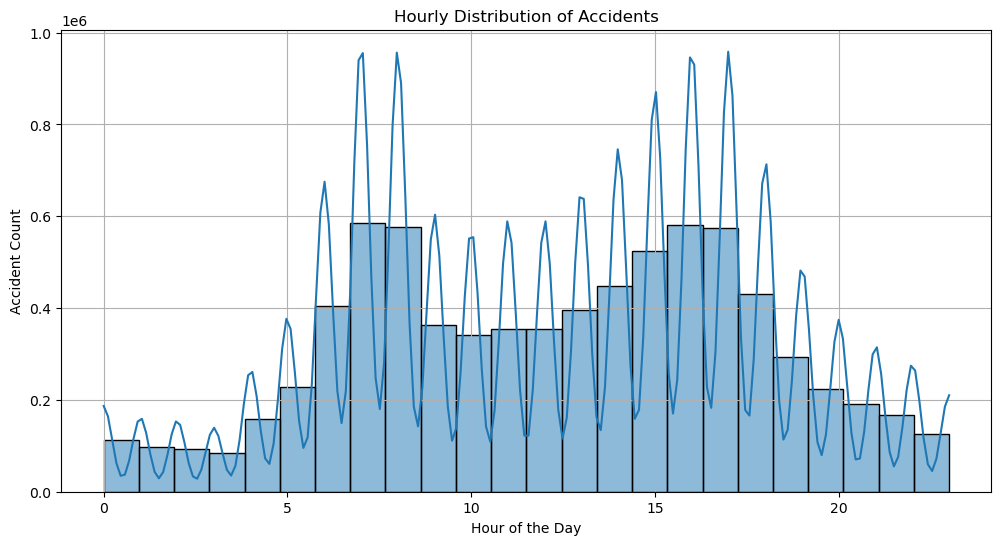

In [33]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Hour'], bins=24, kde=True)
plt.title("Hourly Distribution of Accidents")
plt.xlabel("Hour of the Day")
plt.ylabel("Accident Count")
plt.grid(True)
plt.show()

In [34]:
# Step 7: Visualize Accident Hotspots with Heatmap 

In [41]:
import folium
from folium.plugins import HeatMap


In [40]:
!pip install folium


  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/b5/a8/5f764f333204db0390362a4356d03a43626997f26818a0e9396f1b3bd8c9/folium-0.20.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/f8/9d/91cddd38bd00170aad1a4b198c47b4ed716be45c234e09b835af41f4e717/branca-0.8.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/113.4 kB ? eta -:--:--
   ------- -------------------------------- 20.5/113.4 kB ? eta -:--:--
   ------- -------------------------------- 20.5/113.4 kB ? eta -:--:--
   -------------- ------------------------ 41.0/113.4 kB 393.8 kB/s eta 0:00:01
   --------------------- ----------------- 61.4/113.4 kB 365.7 kB/s eta 0:00:01
   ---------------------------- ---------- 81.9/113.4 kB 416.7 kB/s eta 0:00:01
   -------------------------------------- 113.4/113.4 kB 440.8 kB/s eta 0:00:00


In [42]:
m = folium.Map(location=[df['Start_Lat'].mean(), df['Start_Lng'].mean()], zoom_start=6)
heat_data = df[['Start_Lat', 'Start_Lng']].dropna().values.tolist()
HeatMap(heat_data[:10000]).add_to(m)  
m.save("accident_hotspots.html")

In [43]:
#Step 8: Correlation Between Factors (if using Severity)

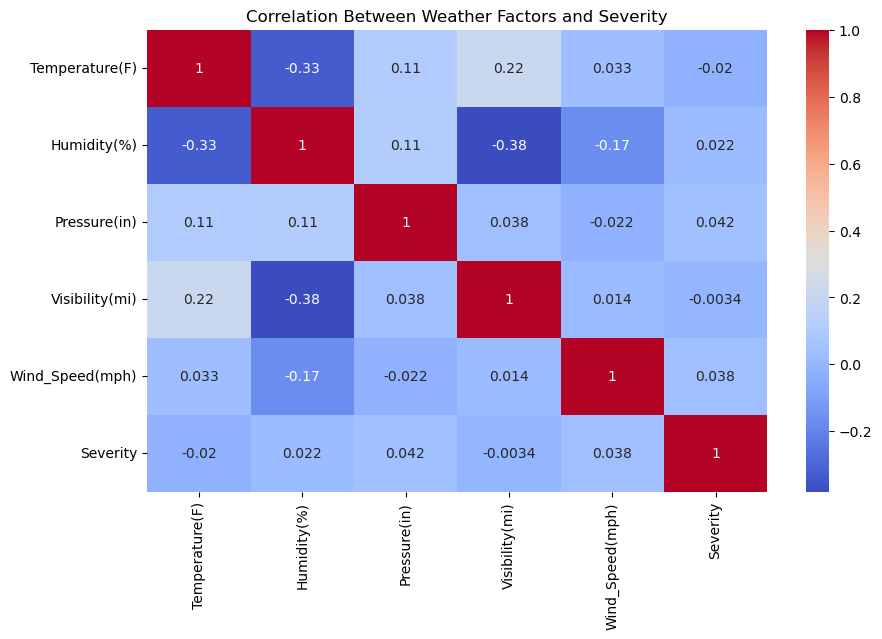

In [44]:
features = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
features = [f for f in features if f in df.columns]

df_corr = df[features + ['Severity']].dropna()

plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Weather Factors and Severity")
plt.show()


In [47]:
# Task 4 – Traffic Accident Analysis

## 📌 Objective
'''Analyze traffic accident data to identify patterns related to:
- Road conditions
- Weather conditions
- Time of day
- Accident hotspots

## 📁 Dataset Overview
The dataset includes:
- Location info (Lat, Lng, City, State)
- Time details (Start_Time, Hour)
- Environmental factors (Weather, Temperature, Visibility)
- Road infrastructure (Traffic Signal, Amenity, Junction)
- Target: Accident Severity

## 📊 Key Analysis Performed
- Countplots of accidents by:
  - Weather Condition
  - Time of Day (Day vs Night)
  - Hour of the Day
- Heatmap of top accident locations using Folium
- Correlation matrix of severity vs weather metrics

## 🧹 Preprocessing
- Dropped highly incomplete columns
- Filled missing values using mode/mean
- Extracted Hour, Day, Month from Start_Time
- Categorical feature engineering (Time of Day)

## 📌 Insights
- Most accidents occur during **evening hours**
- Accidents increase in **poor weather** (Fog, Rain)
- **Urban cities** and areas with traffic signals show higher accident frequency
- Severity shows weak correlation with temperature, humidity, etc.

## 📂 Outputs
- Visuals saved as PNG
- Interactive heatmap: `accident_hotspots.html`
- Cleaned dataset: `cleaned_traffic_data.csv`

## 🛠️ Tools Used
- Python, Pandas, Seaborn, Matplotlib
- Folium for geospatial mapping

---'''


'Analyze traffic accident data to identify patterns related to:\n- Road conditions\n- Weather conditions\n- Time of day\n- Accident hotspots\n\n## 📁 Dataset Overview\nThe dataset includes:\n- Location info (Lat, Lng, City, State)\n- Time details (Start_Time, Hour)\n- Environmental factors (Weather, Temperature, Visibility)\n- Road infrastructure (Traffic Signal, Amenity, Junction)\n- Target: Accident Severity\n\n## 📊 Key Analysis Performed\n- Countplots of accidents by:\n  - Weather Condition\n  - Time of Day (Day vs Night)\n  - Hour of the Day\n- Heatmap of top accident locations using Folium\n- Correlation matrix of severity vs weather metrics\n\n## 🧹 Preprocessing\n- Dropped highly incomplete columns\n- Filled missing values using mode/mean\n- Extracted Hour, Day, Month from Start_Time\n- Categorical feature engineering (Time of Day)\n\n## 📌 Insights\n- Most accidents occur during **evening hours**\n- Accidents increase in **poor weather** (Fog, Rain)\n- **Urban cities** and areas w